In [1]:
import sys
sys.path.append("../HelperFunctions")
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches
from selectrawdata import SelectRawData


Using TensorFlow backend.


In [2]:
raw_data = SelectRawData.Shuffle_from_folder(
    basepath    = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/Dros3DModel/',
    source_dirs = ['Low'],
    target_dir  = 'GT',
    axes        = 'ZYX'
)

In [3]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (40,64,64),
    n_patches_per_image = 512,
    save_file           = '/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/Dros3DModel.npz',
)

  150 raw images x    1 transformations   =   150 images
  150 images     x  512 patches per image = 76800 patches in total
Input data:
/data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Raw_Datasets/Dros3DModel/: target='GT', sources=['Low'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Identity
Patch size:
40 x 64 x 64


100%|██████████| 150/150 [54:27<00:00, 16.07s/it] 


Saving data to /data/u934/service_imagerie/v_kapoor/CurieTrainingDatasets/Drosophilla/Dros3DModel.npz.


In [4]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (76800, 1, 40, 64, 64)
axes  of X,Y = SCZYX


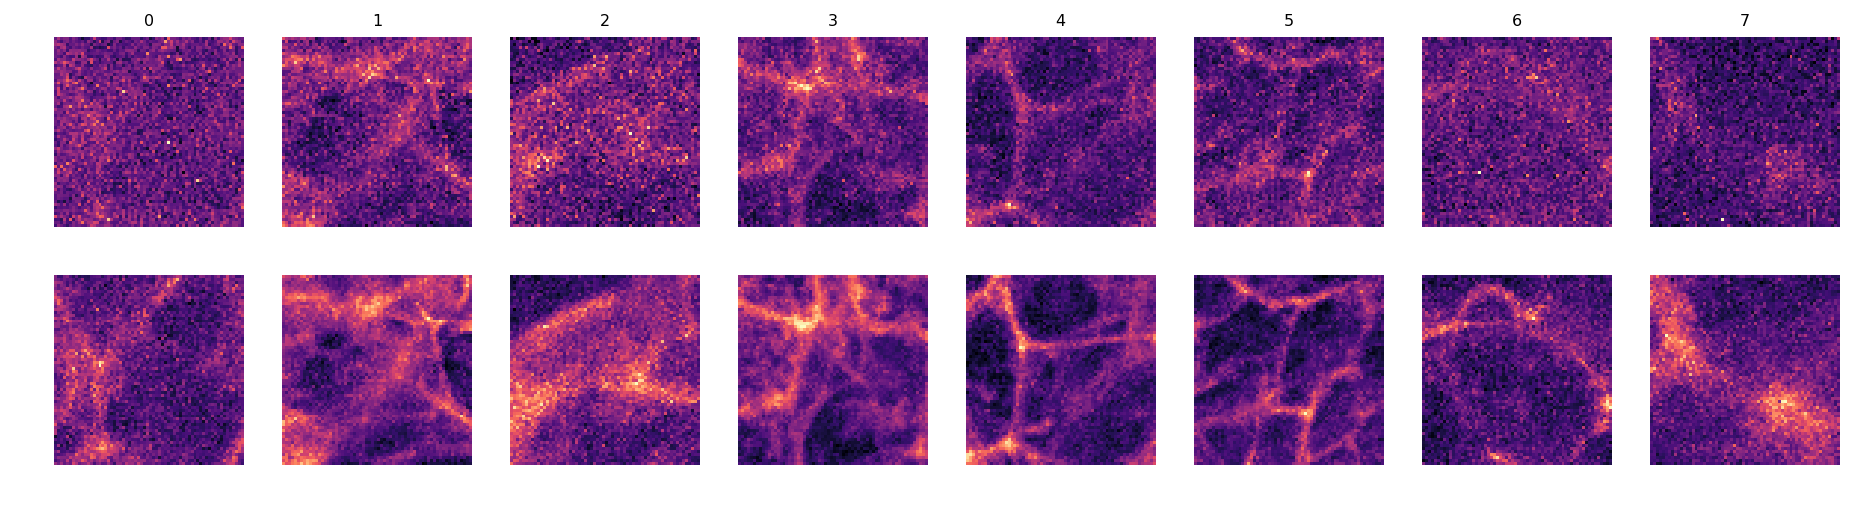

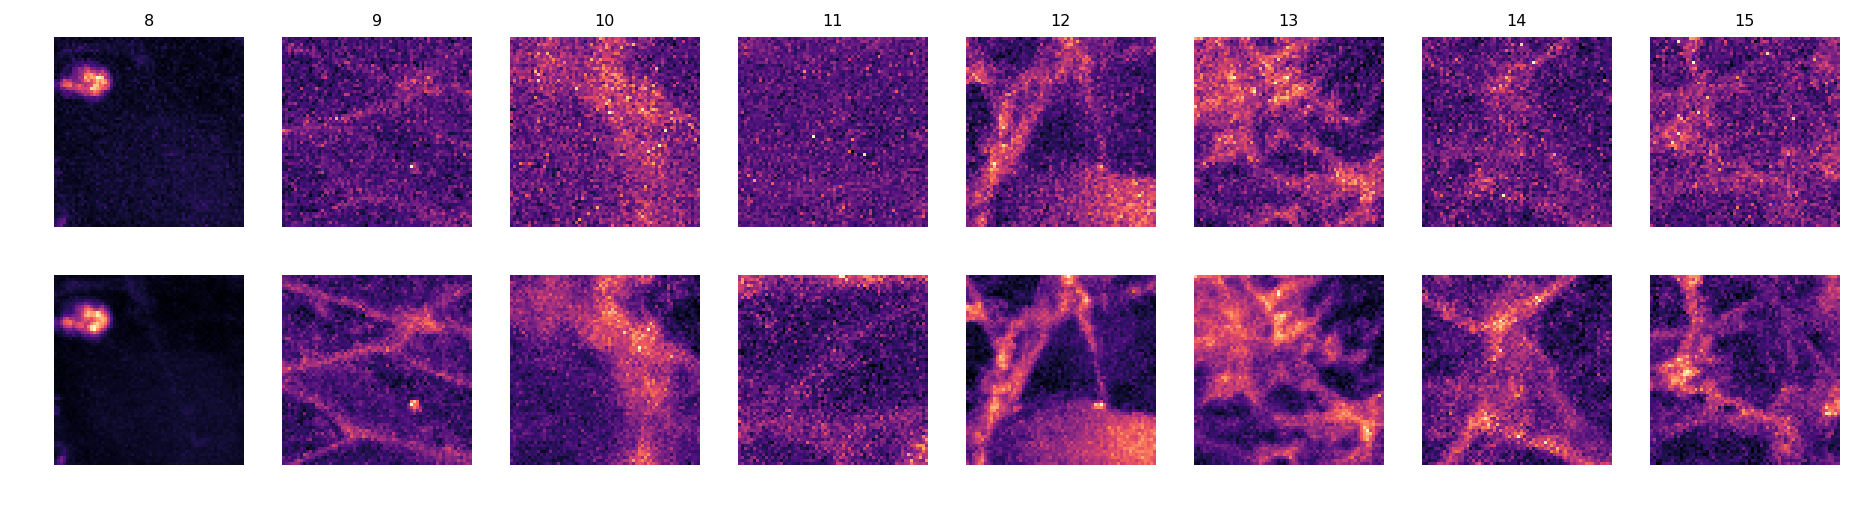

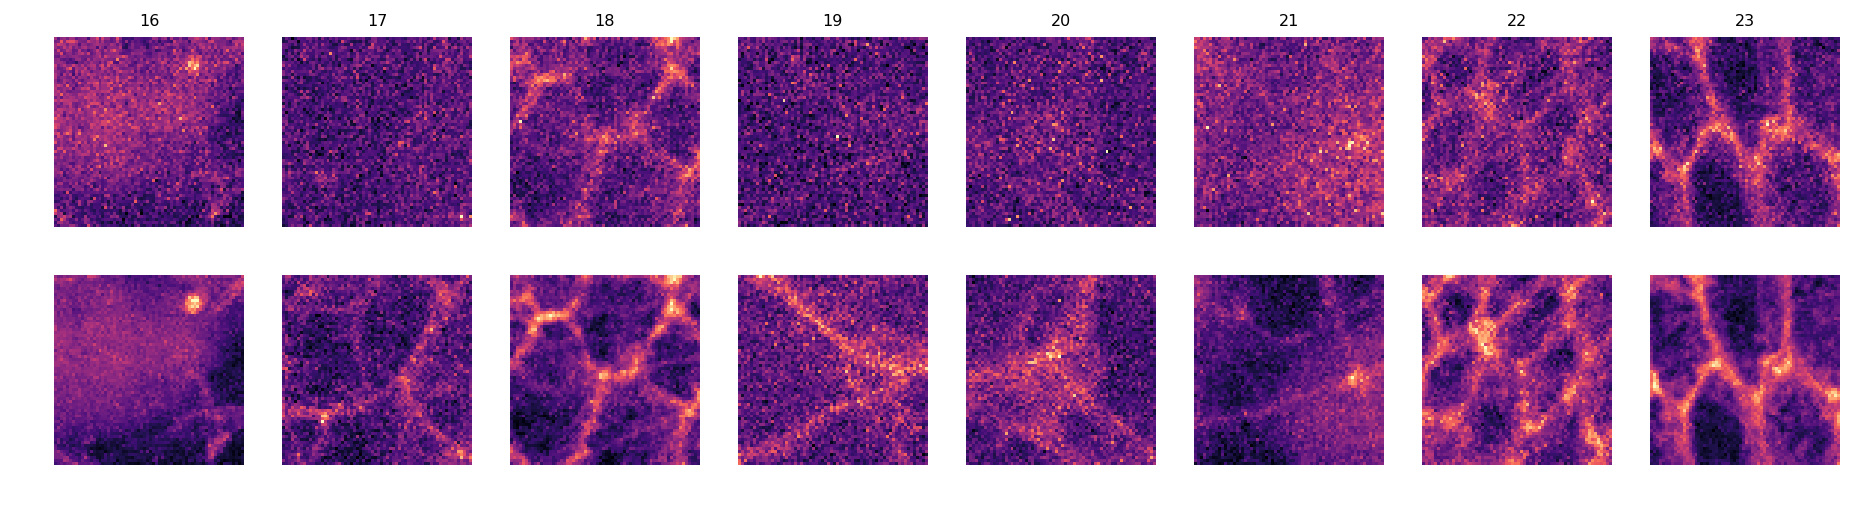

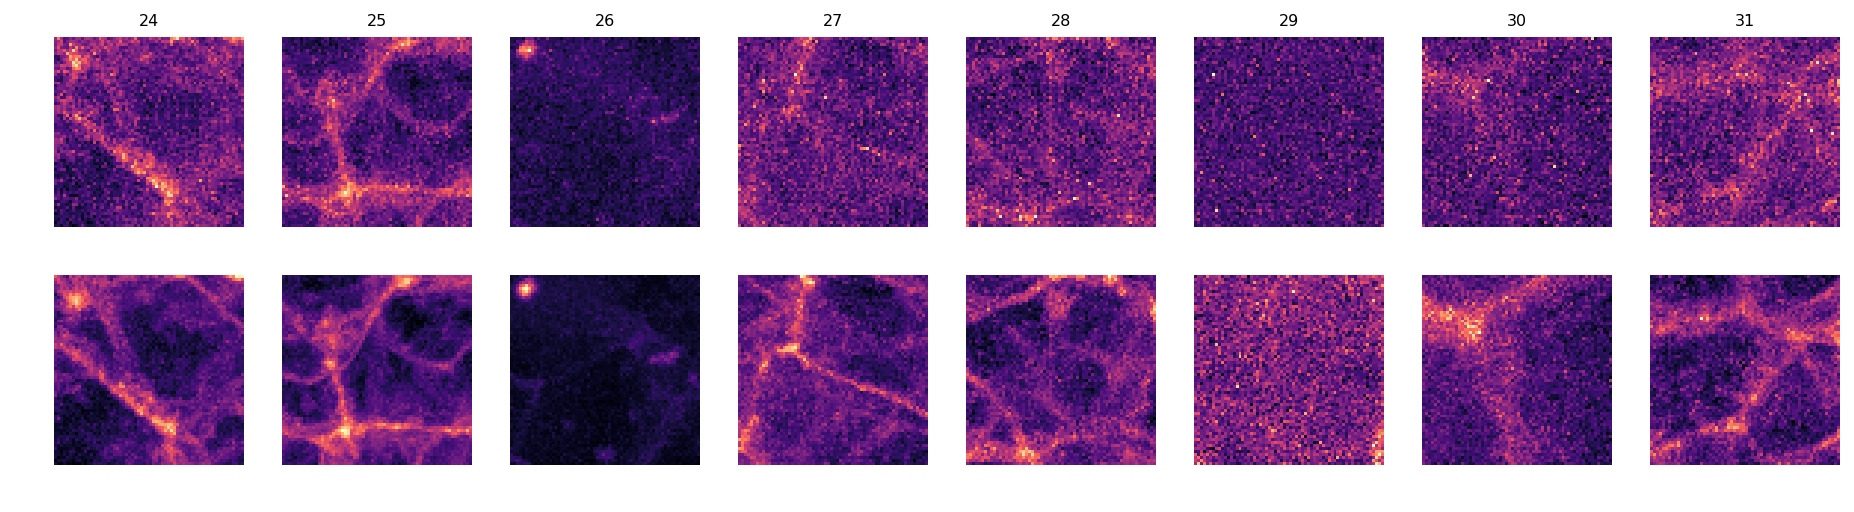

In [7]:
for i in range(4):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;